<a href="https://colab.research.google.com/github/Abhaytyagi55/Abhaytyagi55/blob/main/Resume_Screening_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import kagglehub
import pandas as pd
import os # Import the os module

# Download latest version
path = kagglehub.dataset_download("gauravduttakiit/resume-dataset")

print("Path to dataset files:", path)

# Assuming 'UpdatedResumeDataSet.csv' is in the dataset
file_path = os.path.join(path, 'UpdatedResumeDataSet.csv')
df = pd.read_csv(file_path)

df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/gauravduttakiit/resume-dataset/versions/1


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [8]:
df.shape

(962, 2)

In [9]:
df.Category.value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


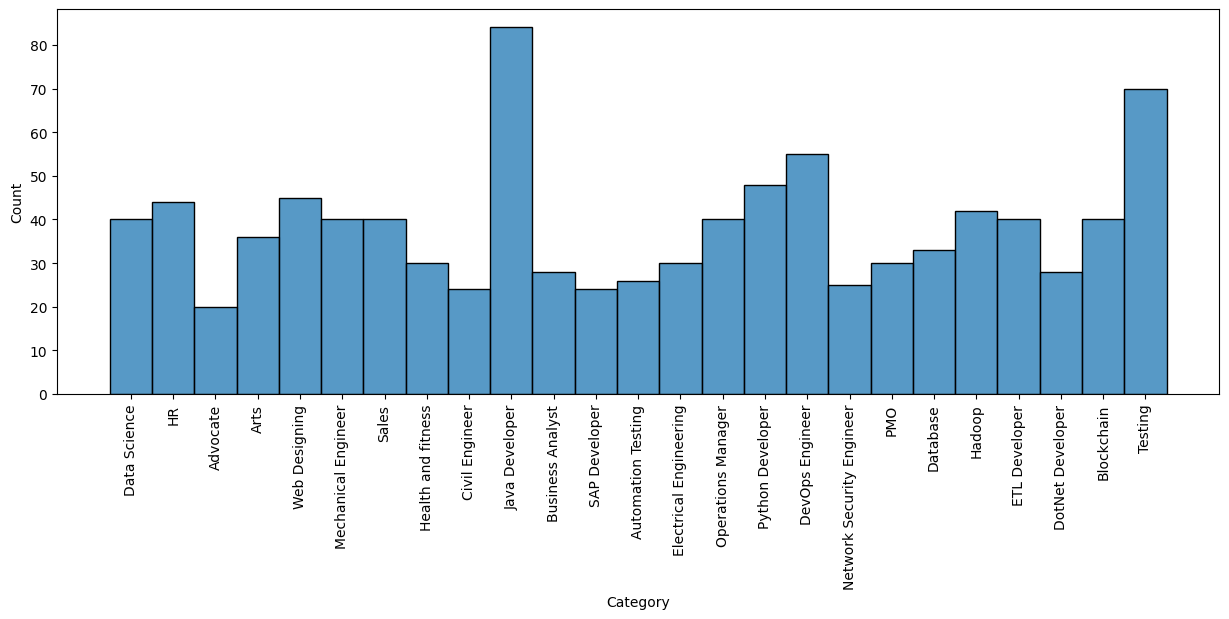

In [10]:
plt.figure(figsize=(15,5))
sns.histplot(df['Category'])
plt.xticks(rotation=90)
plt.show()


In [11]:
counts=df['Category'].value_counts()
labels=df['Category'].nunique()
labels

25

In [12]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

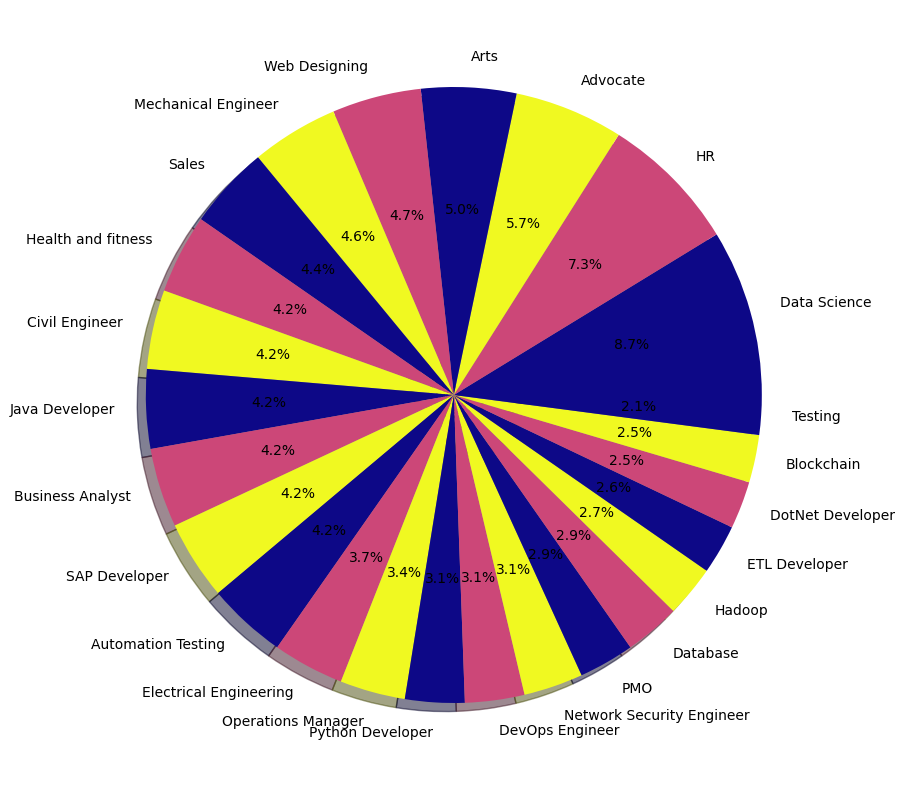

In [13]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True,colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()


In [14]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [15]:
import re
import string
def clear_fun(text):
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
   # text = re.sub('\s+', '', text)
    return text

df['Resume']=df['Resume'].apply(clear_fun)

In [16]:
df['Resume'][0]

'skills   programming languages  python  pandas  numpy  scipy  scikit learn  matplotlib   sql  java  javascript jquery    machine learning  regression  svm  naã ve bayes  knn  random forest  decision trees  boosting techniques  cluster analysis  word embedding  sentiment analysis  natural language processing  dimensionality reduction  topic modelling  lda  nmf   pca   neural nets    database visualizations  mysql  sqlserver  cassandra  hbase  elasticsearch   js  dc js  plotly  kibana  matplotlib  ggplot  tableau    others  regular expression  html  css  angular    logstash  kafka  python flask  git  docker  computer vision   open cv and understanding of deep learning education details     data science assurance associate     data science assurance associate   ernst   young llp  skill details   javascript  exprience     months  jquery  exprience     months  python  exprience     monthscompany details   company   ernst   young llp  description   fraud investigations and dispute services 

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [18]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer (stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt = tfidf.transform(df['Resume'])


In [20]:
requredTaxt

<962x7033 sparse matrix of type '<class 'numpy.float64'>'
	with 157704 stored elements in Compressed Sparse Row format>

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requredTaxt,df['Category'], test_size=0.2, random_state=42)

In [22]:
X_train.shape

(769, 7033)

In [23]:
X_test.shape

(193, 7033)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print (accuracy_score(y_test,ypred))

0.9844559585492227


In [25]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [26]:
myresume="skills   programming languages  python  pandas  numpy  scipy  scikit learn  matplotlib   sql  java  javascript jquery    machine learning  regression  svm  naã ve bayes  knn  random forest  decision trees  boosting techniques  cluster analysis  word embedding  sentiment analysis  natural language processing  dimensionality reduction  topic modelling  lda  nmf   pca   neural nets    database visualizations  mysql  sqlserver  cassandra  hbase  elasticsearch  js  dc js  plotly  kibana  matplotlib  ggplot  tableau    others  regular expression  html  css  angular   logstash  kafka  python flask  git  docker  computer vision   open cv and understanding of deep learning education details     data science assurance associate     data science assurance associate   ernst   young llp  skill details   javascript  exprience    months  jquery  exprience    months  python  exprience    monthscompany details   company   ernst   young llp  description   fraud investigations and dispute services   assurance  technology assisted review  tar  technology assisted review  assists in accelerating the review process and run analytics and generate reports     core member of a team helped in developing automated review platform tool from scratch for assisting e discovery domain  this tool implements predictive coding and topic modelling by automating reviews  resulting in reduced labor costs and time spent during the lawyers review     understand the end to end flow of the solution  doing research and development for classification models  predictive analysis and mining of the information present in text data  worked on analyzing the outputs and precision monitoring for the entire tool     tar assists in predictive coding  topic modelling from the evidence by following ey standards  developed the classifier models in order to identify  red flags  and fraud related issues     tools   technologies  python  scikit learn  tfidf      cosine similarity  naã ve bayes  lda  nmf for topic modelling  vader and text blob for sentiment analysis  matplot lib  tableau dashboard for reporting     multiple data science and analytic projects  usa clients   text analytics   motor vehicle customer review data   received customer feedback survey data for past one year  performed sentiment  positive  negative   neutral  and time series analysis on customer comments across all  categories     created heat map of terms by survey category based on frequency of words   extracted positive and negative words across all the survey categories and plotted word cloud     created customized tableau dashboards for effective reporting and visualizations   chatbot   developed a user friendly chatbot for one of our products which handle simple questions about hours of operation  reservation options and so on     this chat bot serves entire product related questions  giving overview of tool via qa platform and also give recommendation responses so that user question to build chain of relevant answer     this too has intelligence to build the pipeline of questions as per user requirement and asks the relevant  recommended questions     tools   technologies  python  natural language processing  nltk  spacy  topic modelling  sentiment analysis  word embedding  scikit learn  javascript jquery  sqlserver    information governance  organizations to make informed decisions about all of the information they store  the integrated information governance portfolio synthesizes intelligence across unstructured data sources and facilitates action to ensure organizations are best positioned to counter information risk     scan data from multiple sources of formats and parse different file formats  extract meta data information  push results for indexing elastic search and created customized  interactive dashboards using kibana     preforming rot analysis on the data which give information of data which helps identify content that is either redundant  outdated  or trivial     preforming full text search analysis on elastic search with predefined methods which can tag as  pii  personally identifiable information  social security numbers  addresses  names  etc   which frequently targeted during cyber attacks   tools   technologies  python  flask  elastic search  kibana    fraud analytic platform  fraud analytics and investigative platform to review all red flag cases   â   fap is a fraud analytics and investigative platform with inbuilt case manager and suite of analytics for various erp systems     it can be used by clients to interrogate their accounting systems for identifying the anomalies which can be indicators of fraud by running advanced analytics  tools   technologies  html  javascript  sqlserver  jquery  css  bootstrap  node js   js  dc js'"

In [27]:
import pickle
clf = pickle.load(open('clf.pkl','rb'))
cleaned_resume = clear_fun(myresume)
input_features = tfidf.transform([cleaned_resume])
prediction_id = clf.predict(input_features)[0]
category_mapping={
    6:'Data Science',
    12: 'HR',
    0:'Advocate',
    1:'Arts',
    24:'Web Designing',
    16:'Mechanical Engineer',
    22:'Sales',
    14:'Health and fitness',
    5:'Civil Engineer',
    15:'Java Developer',
    4:'Business Analyst',
    21:'SAP Developer',
    2:'Automation Testing',
    11:'Electrical Engineering',
    18:'Operations Manager',
    20:'Python Developer',
    8:'DevOps Engineer',
    17:'Network Security Engineer',
    19:'PMO',
    7:'Database',
    13:'Hadoop',
    10:'ETL Developer',
    9:'DotNet Developer',
    3:'Blockchain',
    23:'Testing',

}
category_name = category_mapping.get(prediction_id,'Unknown')
print('predicted Category:', category_name)
print(prediction_id)

predicted Category: Data Science
6
